In [1]:
%matplotlib inline 
import matplotlib.pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Window functions are like aggregation functions. You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600),
                  columns = ['A', 'B', 'C'])

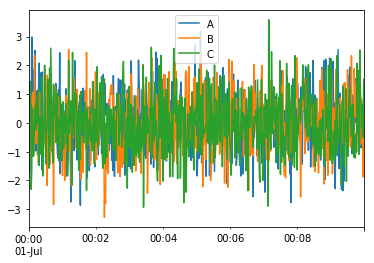

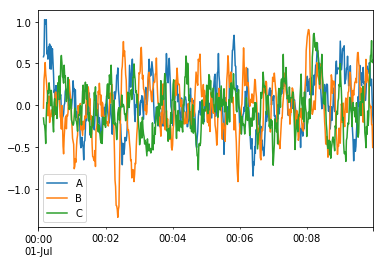

In [3]:
r = df.rolling(window = 10)
# r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile
# r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot()
r.mean().plot()
plt.show()

In [4]:
#exponentially weighted
df.ewm(span = 15, min_periods = 2).mean()[1:10]

,A,B,C
2016-07-01 00:00:01,-0.615058,-1.164013,0.809889
2016-07-01 00:00:02,-0.604222,-1.167571,1.047940
2016-07-01 00:00:03,-0.046466,-0.624343,1.095018
2016-07-01 00:00:04,-0.152783,-0.285938,0.221725
2016-07-01 00:00:05,0.558270,-0.003746,-0.198957
2016-07-01 00:00:06,0.613232,0.143896,-0.048742
2016-07-01 00:00:07,0.849486,0.317596,-0.091088
2016-07-01 00:00:08,0.809427,0.059562,-0.282781
2016-07-01 00:00:09,0.737627,0.084370,-0.404014


In [5]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000),
                  columns = ['A', 'B', 'C', 'D'])

In [6]:
df.head()

,A,B,C,D
2016-06-06,1.184318,0.284801,-0.076933,-0.462338
2016-06-07,-1.399274,-0.661252,-0.092577,0.480565
2016-06-08,-0.914731,-0.238322,-0.517887,1.665671
2016-06-09,-3.576885,1.142509,-1.860802,0.931120
2016-06-10,0.150227,0.459109,0.864656,-1.008312


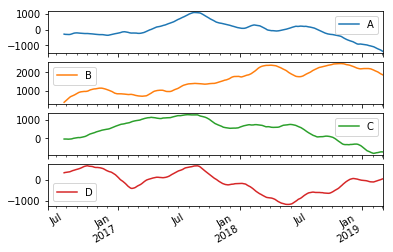

In [7]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)
plt.show()

In [8]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())[1:20]

,A,B,C,D
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.943022,1.029809,1.424983,0.747517
2016-06-16,1.479974,1.161563,1.732917,0.654147


In [9]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.484680,-0.045825,-0.123222,-0.222055
2016-06-08,-0.053442,-0.235475,-0.311280,0.413262
2016-06-09,-1.216725,-0.044672,-0.870510,0.963701
2016-06-10,-1.884649,0.161631,-1.033117,1.092302


### Will an expanding window provide a more or less stable statistic than a rolling statistic?
An expanding window provides a more stable statistic than a rolling one because an expanding window remembers all data while a rolling one has a fixed window size.

### When might one vs. the other be appropriate?
A rolling statistic is appropriate when you want values to update quickly. An expanding window is more applicable for long term trends.

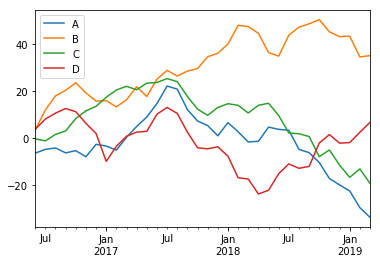

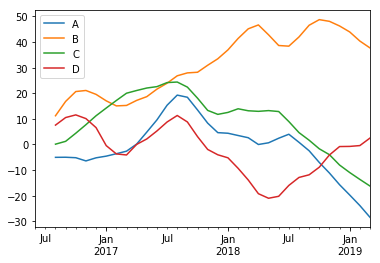

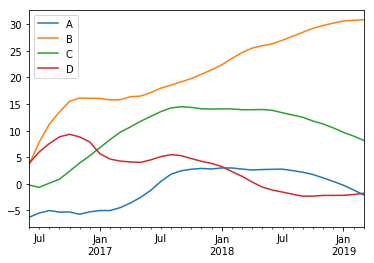

In [10]:
monthly = df.resample('MS').mean()
monthly.plot()
monthly.rolling(window=3).mean().plot()
monthly.expanding().mean().plot()
plt.show()

## EWMA
### Why use EWMA?
An exponentially weighted moving average applies weighting factors that decrease exponentially. This weights recent data higher than older data, while a simple rolling average weights all data points equally. This means an EWMA tracks data closer than a rolling average and will update faster after big changes.